<h1>Trabalho Prático I - Disciplina SME0104<br>
Autora: Ana Cristina Silva de Oliveira, NUSP: 11965630; 16/05/2023</h1>


In [1289]:
import numpy as np
import math
import time

Funções auxiliares utilizadas ao decorrer do programa

In [1290]:
# Formatação da matriz
def matrixFormat(M):
    m = len(M) # Numero de linhas
    n = len(M[0]) # Numero de colunas
    s = ""

    for i in range(m):
        for j in range(n):
            s += "%9.1f" % M[i][j]
        s += "\n"
    return s

In [1291]:
def regressiveReplacement(U,b):
    n = len(U)
    x = n * [0]

    for i in range(n-1,-1,-1):
        S = 0
        for j in range(i+1,n):
            S = S + U[i][j] * x[j]
        x[i] = (b[i] - S)/U[i][i]

    return x

In [1292]:
def progressiveReplacement(L,b):
    n = len(L)
    y = n * [0]
    for i in range(n):
        S = 0
        for j in range(0,i):
            S = S + L[i][j] * y[j]
        y[i] = (b[i] - S)/L[i][i]
    return y

In [1293]:
def upperTriangular(A, b):
    n = len(b)
    x = np.zeros_like(b, dtype=float)

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    x[n-1] = b[n-1] / A[n-1][n-1]

    for i in range(n-2, -1, -1):
        s = np.dot(A[i, i+1:], x[i+1:])
        x[i] = (b[i] - s) / A[i][i]

    return x

def lowerTriangular(A, b):
    n = len(b)
    x = np.zeros_like(b, dtype=float)

    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    x[0] = b[0] / A[0][0]

    for i in range(1, n):
        s = np.dot(A[i, :i], x[:i])
        x[i] = (b[i] - s) / A[i][i]

    return x

**SISTEMAS LINEARES COM MATRIZES SIMÉTICAS**


<br><br>

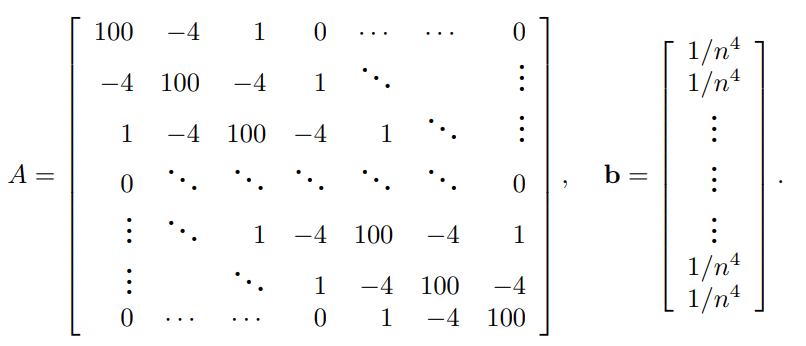

**A)** Escreva um código que monte a matriz A para n = 1000.<br>


A matriz apresentada acima é um exemplo de matriz de banda. Em uma matriz de banda, existem valores p e q, onde p > 1, q < n, que determinam a presença de zeros em certas posições. Para essa matriz, temos que<br> <center> Aij = 0 se i > j + p ou j > i + q</center><br> e a largura da banda é dada por <center>p + q + 1</center>

No caso específico da matriz ser pentadiagonal, o valor de p e q é igual a 2, indicando duas diagonais acima e duas diagonais abaixo da diagonal principal com elementos não nulos. Portanto, a largura da banda para essa matriz é igual a 5.



In [1294]:
'''
O método abaixo constrói uma matriz de banda do tipo pentadiagonal.

Recebe como parâmetros:
n: dimensão da matriz

Retorno:
matrix: matriz de banda pentadiagonal
'''
n = 1000

def buildBandPentadiagonalMatrix(n):
    mainDiagonalValue = 100 # Valor da diagonal principal
    secondaryDiagonalValue = -4 # valor da diagonal secundária
    tertiaryDiagonalValue = 1 # Valor da diagonal terciária
    bandWidth = 5 # Largura da banda
    distanceTwoDiagonalsFromMainDiagonal = 2 
    distanceOneDiagonalsFromMainDiagonal = 1
    
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(max(0, i - bandWidth), min(n, i + bandWidth + 1)):
            # Aij recebe o valor corresponde a diagonal principal
            if i == j: 
                matrix[i, j] = mainDiagonalValue

            # Aij recebe o valor corresponde a diagonal secundária se estiver a uma distancia da diagonal principal
            elif abs(i - j) == distanceOneDiagonalsFromMainDiagonal:
                matrix[i, j] = secondaryDiagonalValue

            # Aij recebe o valor corresponde a diagonal terciária se estiver a duas distancias da diagonal principal
            elif abs(i - j) == distanceTwoDiagonalsFromMainDiagonal:
                matrix[i, j] = tertiaryDiagonalValue
                
    return matrix

In [1295]:
bandMatrix = buildBandPentadiagonalMatrix(n)

# Impressão dos primeiros elementos da matriz
print(matrixFormat(bandMatrix[:5, :5]))

    100.0     -4.0      1.0      0.0      0.0
     -4.0    100.0     -4.0      1.0      0.0
      1.0     -4.0    100.0     -4.0      1.0
      0.0      1.0     -4.0    100.0     -4.0
      0.0      0.0      1.0     -4.0    100.0



**B)** Escreva um código que faça a decomposição de Cholesky de uma matriz simétrica definida positiva qualquer.

In [1296]:
''' O método abaixo simplifica os cálculos da decomposição LU significativamente, levando em 
conta a simetria.
Recebe como parâmetros:
A: matriz simétrica e positiva definida
Retorno:
H: matriz triangular inferior (L)
'''
def cholesky(A):
    n = np.shape(A)[0]
    H = np.tril(A)

    for k in range(n-1):
        H[k][k] = math.sqrt(H[k][k])
        H[k+1:n,k] = H[k+1:n,k] / H[k][k]
        for j in range(k+1,n):
            H[j:n,j] = H[j:n,j] - H[j:n,k] * H[j,k]
    H[n-1][n-1] = math.sqrt(H[n-1][n-1])
    
    return H

In [1297]:
L = cholesky(bandMatrix)
print(matrixFormat(L[:5,:5]))

     10.0      0.0      0.0      0.0      0.0
     -0.4     10.0      0.0      0.0      0.0
      0.1     -0.4     10.0      0.0      0.0
      0.0      0.1     -0.4     10.0      0.0
      0.0      0.0      0.1     -0.4     10.0



**C)** Usando as rotinas implementadas anteriormente, escreva um código para resolver um sistema Ax = b.

In [1298]:
startTimeCholesky = 0
endTimeCholesky = 0

In [1299]:
'''
O método de resolução do sistema Ax = b, é baseado em:
1. Utilizando a decomposição de Cholesky, obtemos a matriz triangular inferior L.
2. Realizamos substituições progressivas para calcular o vetor y, utilizando L e b 
    como parâmetros.
3. Calculamos a matriz U como a transposta de L.
4. Realizamos substituições regressivas para calcular o vetor x, 
    utilizando U e y como parâmetros.
5. Multiplicamos a matriz A pelo vetor x para obter o vetor Ax.
6. Calculamos o erro residual subtraindo o vetor b do vetor Ax.

O erro residual é uma medida da precisão da solução encontrada. 
Quanto mais próximo de zero o erro, mais precisa é a solução. 
Um erro maior indica uma maior discrepância entre o lado esquerdo (Ax) e o 
lado direito (b) do sistema. No caso apresentado, o erro residual é próximo de zero, 
o que indica uma solução precisa.
'''
startTimeCholesky = time.time()
L = cholesky(bandMatrix)
endTimeCholesky = time.time()

b = np.array([1/n**4]*n)
y = progressiveReplacement(L, b)
U = L.T
x = regressiveReplacement(U,y)

Ax = bandMatrix@x
residualError = b - Ax
print("Erro:\n", np.linalg.norm(residualError))


Erro:
 6.402114392106387e-27


**D)** Escreva um código implementando o método de Jacobi para resolver um sistema Ax = b. Utilize o erro absoluto como critério de parada.

In [1300]:
'''
O método abaixo é um algoritmo iterativo que resolve equações de sistemas lineares.
Parametros:
A: matriz de coeficientes
b: vetor de constantes
x0: vetor com valores iniciais
tol: condição de convergência baseada na norma residual do sistema

Retorno:
x0: solução aproximada do sistema de equação linear
k: número de iterações realizadas
'''

def gaussJacobi(A, b, x0, tol):
    n = np.shape(A)[0]
    D = np.diag(np.diag(A))
    C = np.eye(n) - np.linalg.solve(D,A)
    g = np.linalg.solve(D,b)

    kmax = 10000
    k = 0
    x1 = np.array([np.inf]*n)
    # Condição de convergência
    while (np.linalg.norm(x1 - x0) > tol) and k < kmax:
        k += 1
        x1 = x0
        x0 = C@x0 + g
    
    if k == kmax:
        print("Erro: O método não converge")
        return

    return x0, k

In [1301]:
b = np.array([1/n**4]*n)
x0 = np.zeros(n)
x, iterations = gaussJacobi(bandMatrix, b, x0, 0.00000001)

Ax = bandMatrix@x
error = b - Ax
print("Erro:\n", np.linalg.norm(error))

Erro:
 1.8966285877841282e-12


**E)** Vamos comparar o método direto de Cholesky com o iterativo de Jacobi neste exemplo. Observe quanto tempo leva para resolver o sistema usando Cholesky. Quantas iterações foram necessárias no método de Jacobi para obtermos a mesma precisão da solução dada pelo método de Cholesky?

In [1302]:
startTimeJacobi = 0
endTimeJacobi = 0

In [1303]:
startTimeJacobi = time.time()
x, iterations = gaussJacobi(bandMatrix, b, x0, np.linalg.norm(residualError))
endTimeJacobi = time.time()

print("Time Cholesky: ", endTimeCholesky- startTimeCholesky)
print("Time Gauss-Jacobi: ", endTimeJacobi - startTimeJacobi,
      "\nForam necessárias %d iterações de Gauss-Jacobi" % iterations)

Time Cholesky:  2.0511209964752197
Time Gauss-Jacobi:  0.167694091796875 
Foram necessárias 13 iterações de Gauss-Jacobi


**F)** É possível melhorar a implementação da decomposição de Cholesky para o exemplo em questão?

Sim. Observando os resultados acima, podemos concluir que pelo tempo de execução<br>
apresentado, o algoritmo de Cholesky teve um tempo maior de execução do que o método de Gauss-Jacobi. Então, podemos aplicar uma melhoria neste ponto reduzindo o número de operações necessárias durante a decomposição de Cholesky, levando em consideração a estrutura da matriz de banda. Dessa forma, podemos utilizar apenas os valores não nulos da matriz para serem calculados.

Segue abaixo a minha implementação modificada de Cholesky

In [1304]:
startTimeCholeskyModified = 0
endTimeCholeskyModified = 0

In [1305]:
''' 
O método abaixo é uma modificação do algoritmo de Cholesky.
Esta função modificada utiliza os indices startRow e endRow para delimitar a banda penta-
diagonal da matriz, o que evita o cálculo de elementos fora da banda, otimizando assim o
tempo de execução do algoritmo de Cholesky.
'''

def choleskyModified(A):
    n = np.shape(A)[0]
    H = np.zeros_like(A)

    for k in range(n):
        startRow = max(0, k - 4)  # Início da banda pentadiagonal
        endRow = min(n, k + 5)    # Fim da banda pentadiagonal
        # Calculando o elemento diagonal principal da matriz 
        H[k, k] = math.sqrt(A[k, k] - np.sum(H[k, startRow:k] ** 2))

        for i in range(k + 1, endRow):
            startCol = max(0, i - 4)  # Início da banda pentadiagonal
            H[i, k] = (A[i, k] - np.sum(H[i, startCol:k] * H[k, startCol:k])) / H[k, k]

    return H

In [1306]:
startTimeCholeskyModified = time.time()
matrix = choleskyModified(bandMatrix)
endTimeCholeskyModified = time.time()

print("Time Gauss-Jacobi: ", endTimeJacobi - startTimeJacobi)
print("Time Cholesky: ", endTimeCholesky- startTimeCholesky)
print("Time Cholesky Modified: ", endTimeCholeskyModified - startTimeCholeskyModified)
print("Cholesky Modified: \n",matrixFormat(matrix[:5,:5]))
print("Cholesky: \n", matrixFormat(L[:5,:5]))

Time Gauss-Jacobi:  0.167694091796875
Time Cholesky:  2.0511209964752197
Time Cholesky Modified:  0.03435325622558594
Cholesky Modified: 
      10.0      0.0      0.0      0.0      0.0
     -0.4     10.0      0.0      0.0      0.0
      0.1     -0.4     10.0      0.0      0.0
      0.0      0.1     -0.4     10.0      0.0
      0.0      0.0      0.1     -0.4     10.0

Cholesky: 
      10.0      0.0      0.0      0.0      0.0
     -0.4     10.0      0.0      0.0      0.0
      0.1     -0.4     10.0      0.0      0.0
      0.0      0.1     -0.4     10.0      0.0
      0.0      0.0      0.1     -0.4     10.0



**Método de Newton para sistemas não-lineares**
 

**A)** Calcule a fatoração LU de uma matriz qualquer

In [1307]:
# Decompõe a matriz A em produto de duas matrizes L e U. Onde L é uma triangular inferior
# e U é uma triangular superior.
def decompositionLU(A):
    n = len(A)
    # inicializa a matriz L como identidade
    L = np.identity(n)    

    for k in range(0,n-1):
        # para cada linha i, calcula o fator m
        for i in range(k+1, n):
            m = - A[i][k]/A[k][k]
            L[i][k] = -m
            # atualiza linha i
            for j in range(k+1, n):
                A[i][j] = m * A[k][j] + A[i][j]

            # zera o elemento de A[i][k]
            A[i][k] = 0

    return (L,A)        

In [1308]:
# Decompondo a matriz A no produto de duas matrizes triangulares: L e U
m = [[5,2,1],
     [3,1,4],
     [1,1,3]]
(L,U) = decompositionLU(m)
    
print("L: \n%s" % matrixFormat(L))
print("U: \n%s" % matrixFormat(U))

L: 
      1.0      0.0      0.0
      0.6      1.0      0.0
      0.2     -3.0      1.0

U: 
      5.0      2.0      1.0
      0.0     -0.2      3.4
      0.0      0.0     13.0



**B)** Resolva um sistema linear cujo lado direito é uma matriz

In [1309]:
'''
O método abaixo resolve o sistema LUx = b.
Parâmetros:
L: Triangular inferior
U: Triangular superior
b: vetor de constantes

Retorno:
x: Vetor solução de U
y: Vetor solução de L
'''
def lux(L,U,b):
    y = lowerTriangular(L,b)
    x = upperTriangular(U,y)
    return x

In [1310]:
# Decompondo a matriz A no produto de duas matrizes triangulares: L e U
A = [[1,2,0],
     [1,3,1],
     [-2,0,1]]

B = [[3,5,-1],
     [1,1,1],
     [2,3,4]]

(L,U) = decompositionLU(A)
print("L: \n", matrixFormat(L))
print("U: \n", matrixFormat(U))

x = lux(L, U, B)
print("X: \n", matrixFormat(x))
print("Conferindo...\nLUx =\n", matrixFormat(L@U@x), "\nB =\n", matrixFormat(B))

L: 
       1.0      0.0      0.0
      1.0      1.0      0.0
     -2.0      4.0      1.0

U: 
       1.0      2.0      0.0
      0.0      1.0      1.0
      0.0      0.0     -3.0

X: 
      -3.7     -6.3     -1.0
      3.3      5.7      0.0
     -5.3     -9.7      2.0

Conferindo...
LUx =
       3.0      5.0     -1.0
      1.0      1.0      1.0
      2.0      3.0      4.0
 
B =
       3.0      5.0     -1.0
      1.0      1.0      1.0
      2.0      3.0      4.0



**C)** Finalmente, calcule a inversa de uma matriz qualquer resolvendo vários sistemas lineares. 

In [1311]:
def inverseMatrix(A):
    n = len(A)
    identity = np.identity(n)
    L, U = decompositionLU(A)
    invMatrix = np.zeros((n, n))
    
    # Resolver o sistema linear Ly = I
    for col in range(n):
        y = np.zeros(n)
        for i in range(n):
            y[i] = identity[i][col] - sum(L[i][j] * y[j] for j in range(i))
        
        # Resolver o sistema linear Ux = y
        x = np.zeros(n)
        for i in range(n-1, -1, -1):
            x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i+1, n))) / U[i][i]

        invMatrix[:, col] = x

    return invMatrix


In [1312]:
originalMatrix = np.array([[1,2,3],
                           [0,1,4],
                           [0,0,1]])
inv = inverseMatrix(originalMatrix)
print("Original Matrix:\n", matrixFormat(originalMatrix))
print("Inverse Matrix:\n", matrixFormat(inv))

Original Matrix:
       1.0      2.0      3.0
      0.0      1.0      4.0
      0.0      0.0      1.0

Inverse Matrix:
       1.0     -2.0      5.0
      0.0      1.0     -4.0
      0.0      0.0      1.0



**2)** Implemente o método de Newton para sistemas usando a rotina implementada no item anterior.
Lembre-se de especificar o critério de parada utilizado.

Sistema utilizado:<br>
$F_1 = x_1^2 + x_2^2 - 2 = 0$ <br>
$F_2 = x_1^2 - \frac{(x_2^2)}{9} - 1 = 0$

In [1313]:
DIVERGE = 0
CONVERGE = 1
x0 = [1,1]
tol = 1e-10

In [1314]:
def F(x):
    n = len(x)
    f = [0]*n
    f[0] = x[0]**2 + x[1]**2 - 2
    f[1] = x[0]**2 - (x[1]**2)/9 - 1
    return f

In [1315]:
def J(x):
    j = [[0,0],[0,0]]
    j[0][0] = 2*x[0]
    j[0][1] = 2*x[1]
    j[1][0] = 2*x[0]
    j[1][1] = (-2/9)*x[1]

    return j

Critério de parada utilizado:<br>
A função np.linalg.norm() calcula a norma do vetor f, que representa a função avaliada no ponto x. A norma é então comparada com uma tolerância tol para determinar se o método convergiu o suficiente.<br>

Se a norma de f for menor que tol, o código retorna o valor de x1 (a solução aproximada) e um status de convergência "CONVERGE". Caso contrário, o código continua iterando até atingir o limite máximo de iterações kmax. Se alcançar esse limite sem satisfazer a condição de parada, o código retorna -1 como resultado e um status de divergência "DIVERGE".

In [1316]:
def newtonWithInverseMatrix(F, J, x0, tol):
    x = x0
    k = 0
    kmax = 1000

    while k < kmax:
        j = J(x)
        f = F(x)
        x1 = x - (inverseMatrix(j)@f)

        if np.linalg.norm(f) < tol:
            return x1, CONVERGE
        x = x1
        k += 1
    return -1, DIVERGE


In [1317]:
anwser, divergeOrConverge = newtonWithInverseMatrix(F, J,x0,tol)

if divergeOrConverge == CONVERGE:
    print("Solução encontrada: \n", anwser)
    print("Conferindo...\n",F(anwser))
else:
    print("A função diverge: \n", F(anwser))


Solução encontrada: 
 [1.04880885 0.9486833 ]
Conferindo...
 [0.0, 0.0]


**3)** Implemente novamente o método de Newton para sistemas usando o algoritmo anterior. Utilize
as rotinas já implementadas neste trabalho para resolução do sistema linear, indicando sempre
qual está usando.

In [1318]:
def newtonWithoutInverseMatrix(F, J, x0, tol):
    k = 0
    kmax = 1000

    while k < kmax:
        j = np.array(J(x0))
        f = -np.array(F(x0))

        L, U = decompositionLU(j)
        
        s = lux(L, U, f)
        x1 = np.array(x0) + s

        if np.linalg.norm(f) < tol:
            return x1, CONVERGE
        x0 = x1
        k += 1
    return -1, DIVERGE

In [1319]:
anwser, divergeOrConverge = newtonWithoutInverseMatrix(F, J,x0,tol)

if divergeOrConverge == CONVERGE:
    print("Solução encontrada: \n", anwser)
    print("Conferindo...\n",F(anwser))
else:
    print("A função diverge: \n", F(anwser))

Solução encontrada: 
 [1.04880885 0.9486833 ]
Conferindo...
 [0.0, 0.0]


**4)** Dada a equação de um círculo $(x-a)² + (y-b)^2 = R^2$ e três pontos que passam por esse círculo:<br>
$x | 8.21 | 0.34 | 5.96 |$<br>
$y | 0.00 | 6.62 |-1.12 |$

**A)** Monte um sistema não-linear para determinar a, b e R.

In [1320]:
def functionForEquationSystem(x):
    f = np.zeros(3, dtype=np.float64)
    f[0] = (8.21 - x[0]) ** 2 + (0.00 - x[1]) ** 2 - x[2] ** 2
    f[1] = (0.34 - x[0]) ** 2 + (6.62 - x[1]) ** 2 - x[2] ** 2
    f[2] = (5.96 - x[0]) ** 2 + (-1.12 - x[1]) ** 2 - x[2] ** 2
    return f

In [1321]:

def partialDerivatives(x):
    dp = np.zeros((3, 3), dtype=np.float64)
    dp[0, 0] = -2 * (8.21 - x[0])
    dp[0, 1] = -2 * (-x[1])
    dp[0, 2] = -2 * x[2]
    dp[1, 0] = -2 * (0.34 - x[0])
    dp[1, 1] = -2 * (6.62 - x[1])
    dp[1, 2] = -2 * x[2]
    dp[2, 0] = -2 * (5.96 - x[0])
    dp[2, 1] = -2 * (-1.12 - x[1])
    dp[2, 2] = -2 * x[2]
    return dp

In [1322]:
def newton(functionForEquationSystem, derivativeFunc, x0, tol):
    x = x0
    k = 0
    kmax = 1000

    while k < kmax:
        dfunc = derivativeFunc(x)
        f = functionForEquationSystem(x)
        L, U = decompositionLU(dfunc)
        s = lux(L, U, f)
        xi = x - s

        if np.linalg.norm(f) < tol:
            return xi
        x = xi
        k = k + 1
    return -1

In [1323]:
anwser = newton(functionForEquationSystem, partialDerivatives, x0=[1.0,2.0,3.0], tol=1e-10)
print("Solução encontrada: \n", anwser)


Solução encontrada: 
 [4.83010565 3.96992168 5.21382431]


**B)** Resolva o sistema não-linear utilizando os códigos feitos nos itens 2 e 3.

In [1324]:
x0 = [1.0,2.0,3.0]

solutionNewtonItem2 = newtonWithInverseMatrix(functionForEquationSystem, partialDerivatives, x0, tol=1e-10)

solutionNewtonItem3 = newtonWithoutInverseMatrix(functionForEquationSystem, partialDerivatives, x0, tol=1e-10)

print("Newton With Inverse Matrix: \n", solutionNewtonItem2)
print("Newton With LU Decomposition: \n", solutionNewtonItem3)

Newton With Inverse Matrix: 
 (array([4.83010565, 3.96992168, 5.21382431]), 1)
Newton With LU Decomposition: 
 (array([4.83010565, 3.96992168, 5.21382431]), 1)


**C)** Houve melhora no tempo de execução do código implementado no item 3?

In [1325]:
nTests = 100
x0 = [1.0,2.0,3.0]

def averageTimeExecution(func, F, J, x0, tol):
    averageTime = []
    for _ in range(nTests):
        start = time.time()
        func(F,J,x0, tol)
        averageTime.append(time.time() - start)
    return np.average(averageTime)

Sim, o método de Newton sem o uso da função de calcular a inversa de uma matriz, é duas vezes mais rápido que o procedimento de Newton com o cálcula da inversa da matriz em termos de tempo de execução.






In [1326]:
averageTimeExecNewtonWithInvMatrix = averageTimeExecution(newtonWithInverseMatrix, functionForEquationSystem, partialDerivatives, x0, tol=1e-10)
averageTimeExecNewtonWithoutInvMatrix = averageTimeExecution(newtonWithoutInverseMatrix, functionForEquationSystem, partialDerivatives, x0, tol=1e-10)

print("Average Time Newton Without Inverse Matrix:\n", averageTimeExecNewtonWithoutInvMatrix/averageTimeExecNewtonWithInvMatrix)

Average Time Newton Without Inverse Matrix:
 0.602775355450237


**D)** Finalmente, com os resultados a, b e R, utilizando a equação do círculo dada por <br>
$(x-a)² + (y-b)^2 = R^2$

Imprima o gráfico que representa esse círculo.

In [1327]:
import matplotlib.pyplot as plt

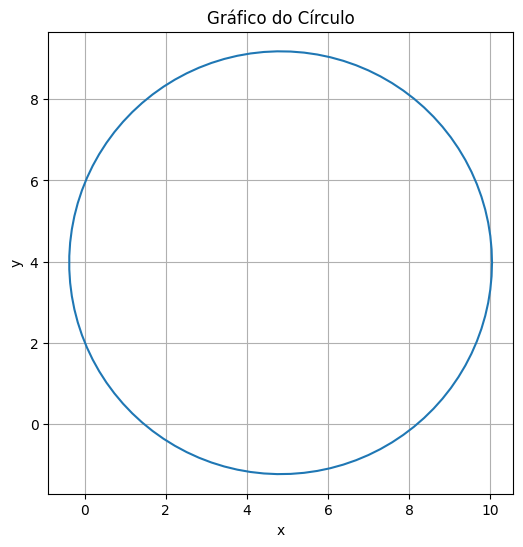

In [1328]:
# Valores de a, b e R
a = 4.83010565
b = 3.96992168
R = 5.21382431

# Criar um array de valores de theta de 0 a 2*pi
theta = np.linspace(0, 2*np.pi, 100)

# Calcular as coordenadas x e y do círculo
x = a + R * np.cos(theta)
y = b + R * np.sin(theta)

# Plotar o gráfico do círculo
plt.figure(figsize=(6, 6))
plt.plot(x, y)
plt.axis('equal')  # Para manter a proporção dos eixos x e y iguais
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico do Círculo')
plt.grid(True)
plt.show()
